# Matplotlib. Homework №1. Evgrafov Michail 915.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

**Используемые средства:**

>1. matplotlib.pyplot
>2. numpy
>3. cv2
>4. Встроенные функции python.

### Класс для отрисовки графиков.

Для того, чтобы облегчить тестирование функция, а также для успешного выполнения первых двух заданий, решено было написать специальный класс для построения большого количества единообразных функций. В целом, работа класса схожа с работой функции *plt.subplots()*, однако, в отличие от этой функции, классу требуется функция построения графиков, после чего все графики могут быть построены в одну строчку. Этот путь показался мне наиболее приемлемым. 

In [2]:
class MultiSchedule():
    """
    There is a special class to draw a big
    number of schedules
    
    mcols - number of columns with schedules
    
    nrows - number of rows with schedules
    
    func - function that build schedule
    
    """
    def __init__(self, mcols, nrows, func):
        self.__fig = plt.figure(figsize=(mcols * 6.4, nrows * 4.8))
        self.__weight = round(8 / (mcols * 10), 2)
        self.__hight = round(8 / (nrows * 10), 2)
        self.__rows = nrows
        self.__cols = mcols
        self.__func = func
        self.__i = 0
        
    def add_schedule(self, kwargs, polar_flag=False):
        """
        There is a function to add new schedule to
        the figure
        
        """
        try:
            if self.__i >= (self.__rows * self.__cols):
                raise Exception('Error: there are no free locs')
                
            left = (1 / self.__cols) * (self.__i % self.__cols)
            bottom = 1 - (1 / self.__rows) * (self.__i // self.__cols)
            
            ax = self.__fig.add_axes([left, bottom, self.__weight, self.__hight], 
                                     polar=polar_flag)
            
            self.__func(ax, **kwargs)
            
            self.__i += 1
            
        except Exception as err:
            print(err.args[0])
        
    def show(self):
        """
        There is a function to show all schedules
        
        """
        plt.show()

### Задание №1. Столбчатые диаграммы.

**Цель**: Построение столбчатых bar-диаграмм с помощью средств matplotlib.pyplot. 

#### Реализация.

In [3]:
def create_bar(ax, title='', labels=[], local=[], glob=[], 
               l_label=[], g_label=[]):
    """
    There is a function to build a single bar-diagramm
    
    """
    x, width = np.arange(len(labels)), 0.4
            
    g_diagram = ax.bar(x, glob, width, color='m', edgecolor='k', 
                       label=g_label)
    l_diagram = ax.bar(x, local, width, color='c', edgecolor='k',
                       label=l_label)
            
    ax.set_title(title, fontsize=15, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=11, fontweight='bold')
    ax.set_ylabel('Amount', fontsize=11, fontweight='bold')
        
    ax.legend()
    ax.grid()

#### Выполнение задания.

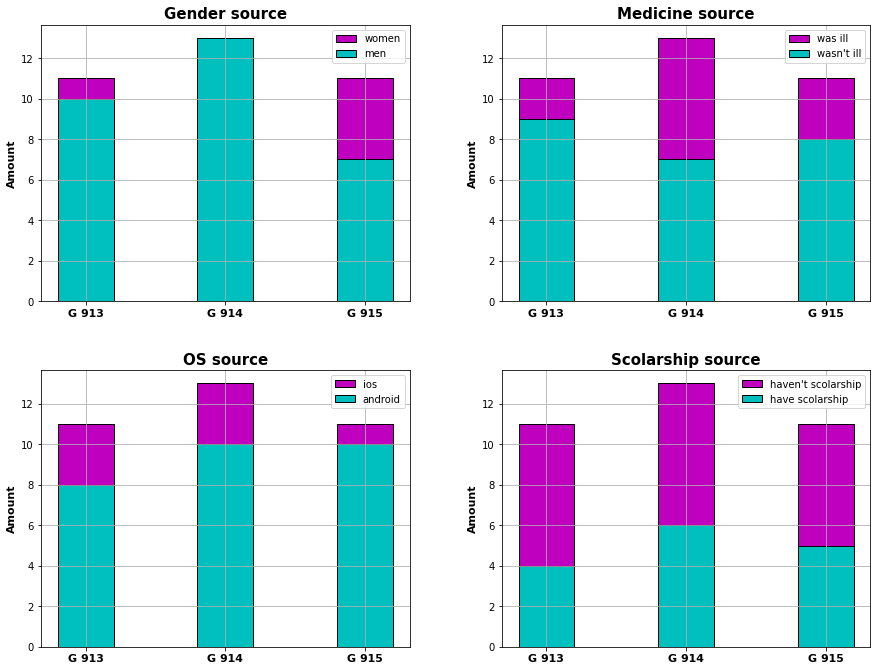

In [4]:
labels = ['G 913', 'G 914', 'G 915']

amount_of_people = [11, 13, 11] 
group_amounts = [[10, 13, 7],
                 [9, 7, 8],   
                 [8, 10, 10], 
                 [4, 6, 5]]   

titles = ['Gender source', 'Medicine source', 'OS source', 'Scolarship source']
l_labels = ['men', "wasn't ill", 'android', 'have scolarship']
g_labels = ['women', 'was ill', 'ios', "haven't scolarship"]
                 
my_bars = MultiSchedule(2, 2, create_bar)

for i in range(len(titles)):
    
    my_dict = dict()
    my_dict['title'], my_dict['labels'] = titles[i], labels
    my_dict['local'], my_dict['glob'] = group_amounts[i], amount_of_people
    my_dict['l_label'], my_dict['g_label'] = l_labels[i], g_labels[i]
    
    my_bars.add_schedule(my_dict)
        
my_bars.show()

### Задание №2

**Цель**: Построение круговых pie-диаграмм с помощью средств matplotlib.pyplot. 

#### Реализация.

In [5]:
def create_pie(ax, title='', parts=[], labels=[]):
    """
    There is a function to build a single pie-diagramm
    
    """
    parts = np.array(parts)
    explode = np.array([(part / np.sum(parts) / 5) for part in parts])
    
    ax.pie(parts, explode=explode, labels=labels, autopct='%1.1f%%', 
           shadow=True)
        
    ax.set_title(title, fontsize=20, fontweight='bold')

#### Непосредственное выполнение задания:

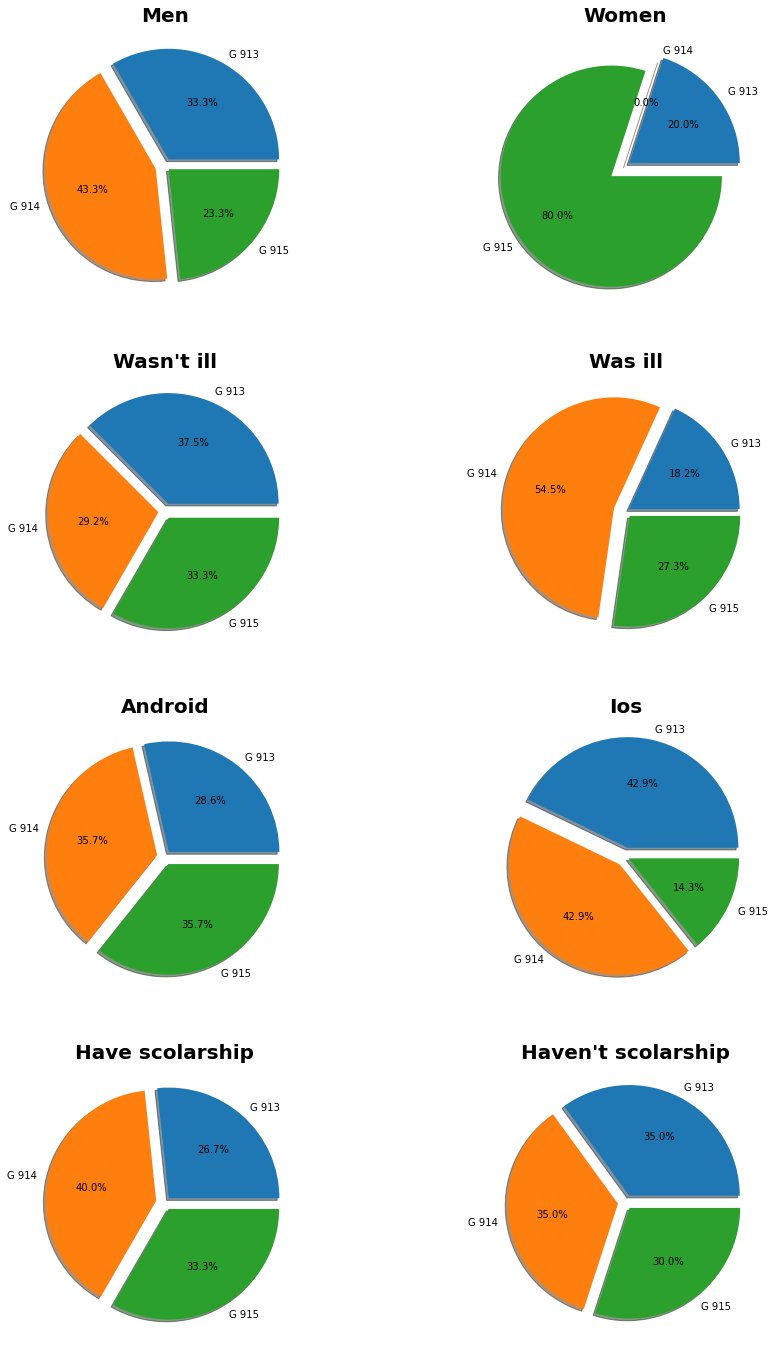

In [6]:
labels = ['G 913', 'G 914', 'G 915']

amount_of_people = np.array([11, 13, 11])
group_amounts = [np.array([10, 13, 7]),
                 np.array([9, 7, 8]),   
                 np.array([8, 10, 10]), 
                 np.array([4, 6, 5])]   

titles = ['Men', 'Women', "Wasn't ill", 'Was ill', 
          'Android', 'Ios', 'Have scolarship', "Haven't scolarship"]
                 
my_pies = MultiSchedule(2, 4, create_pie)

for i in range(len(group_amounts)):
    my_dict1, my_dict2 = dict(), dict()
    my_dict1['title'], my_dict2['title'] = titles[2 * i], titles[2 * i + 1]
    my_dict1['parts'], my_dict2['parts'] = group_amounts[i], amount_of_people - group_amounts[i]
    my_dict1['labels'], my_dict2['labels'] = labels, labels
    
    my_pies.add_schedule(my_dict1)
    my_pies.add_schedule(my_dict2)
    
my_pies.show()

### Задание №3

#### Пункт 3.1. Спираль.

**Цель**: построение графика спирали в полярной системе координат.

*Замечание*: Для достижения поставленной цели напишем функцию, с регулируемым целым числом витков.

#### Реализация.

In [7]:
def create_spiral(ax, loops_num=1):
    """
    There is a function that paints spiral 
    with defined loops number
    
    """
    r = np.linspace(0, 2 * np.pi * loops_num, 200 * loops_num)
    
    ax.plot(r, r, color='b')
    ax.set_title(f'Loops number = {loops_num}', fontsize=15,
                fontweight='bold')
    ax.set_rmin(0)
    ax.set_rticks([])

#### Непосредственное выполнение задания.

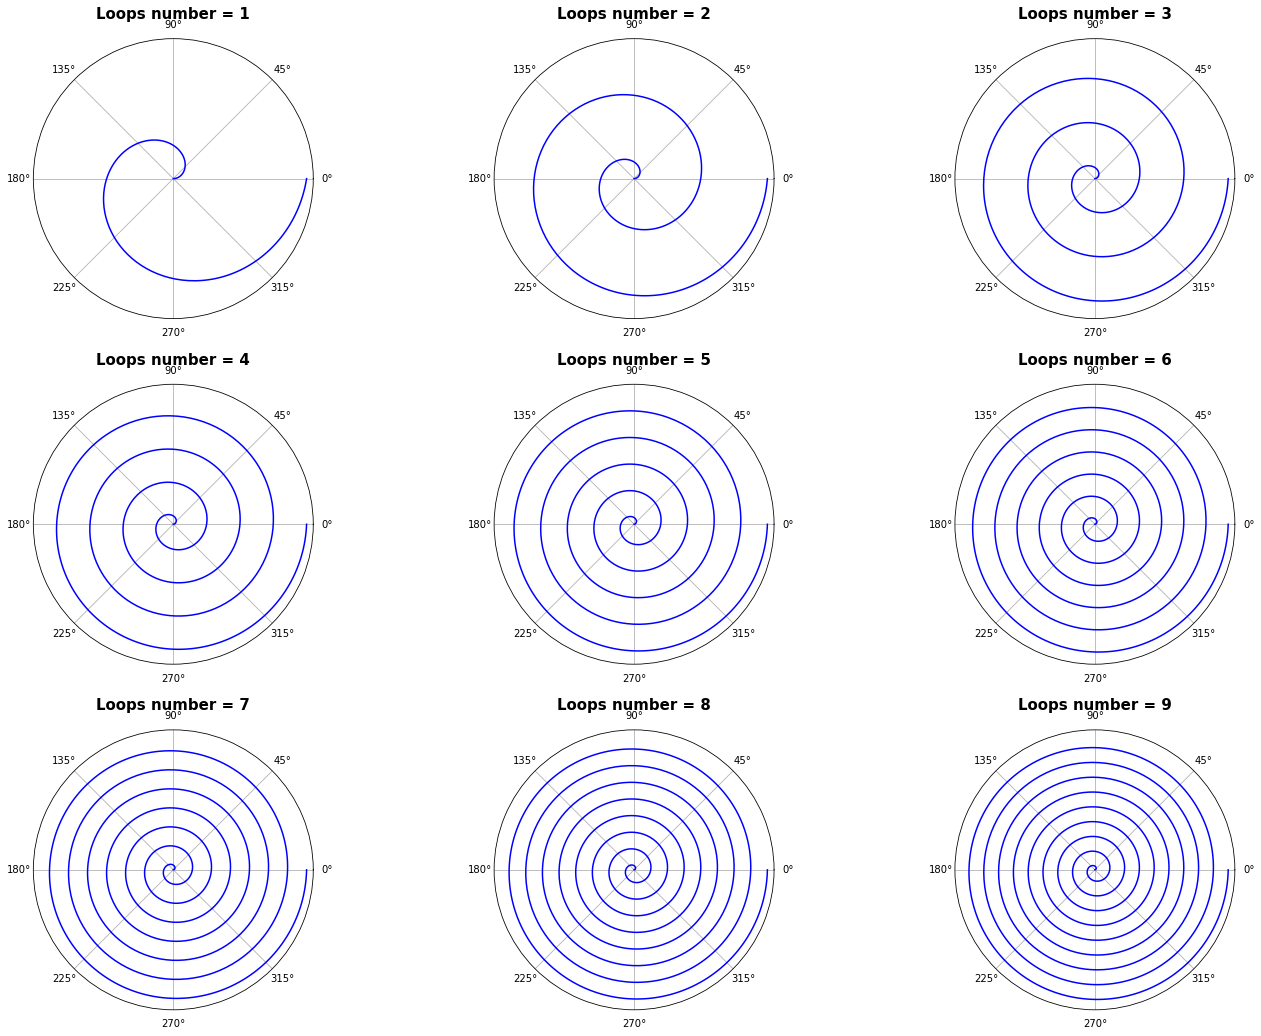

In [8]:
my_spirals = MultiSchedule(3, 3, create_spiral)

for i in range(1, 10):
    my_dict = {'loops_num' : i}
    
    my_spirals.add_schedule(my_dict, polar_flag=True)
    
my_spirals.show()

#### Пункт 3.2. Цветочек. 

**Цель**: построение графика цветочка в полярной системе координат.

*Замечание*: Для достижения поставленной цели напишем функцию, с регулируемым целым числом лепестков.

In [9]:
def create_flower(ax, petals_num=1):
    """
    There is a function that paints flower 
    with defined petals number
    
    """
    ax.set_facecolor('pink')

    x = np.linspace(0, 2 * np.pi, 361 * petals_num)

    ax.plot(x, np.sin(petals_num * x), color='r')
    ax.set_title(f'Petals number = {petals_num}', fontsize=15,
                fontweight='bold')
    ax.set_rmin(-1)
    ax.set_rticks([])

    ax.grid(False)

#### Непосредственное выполнение задания.

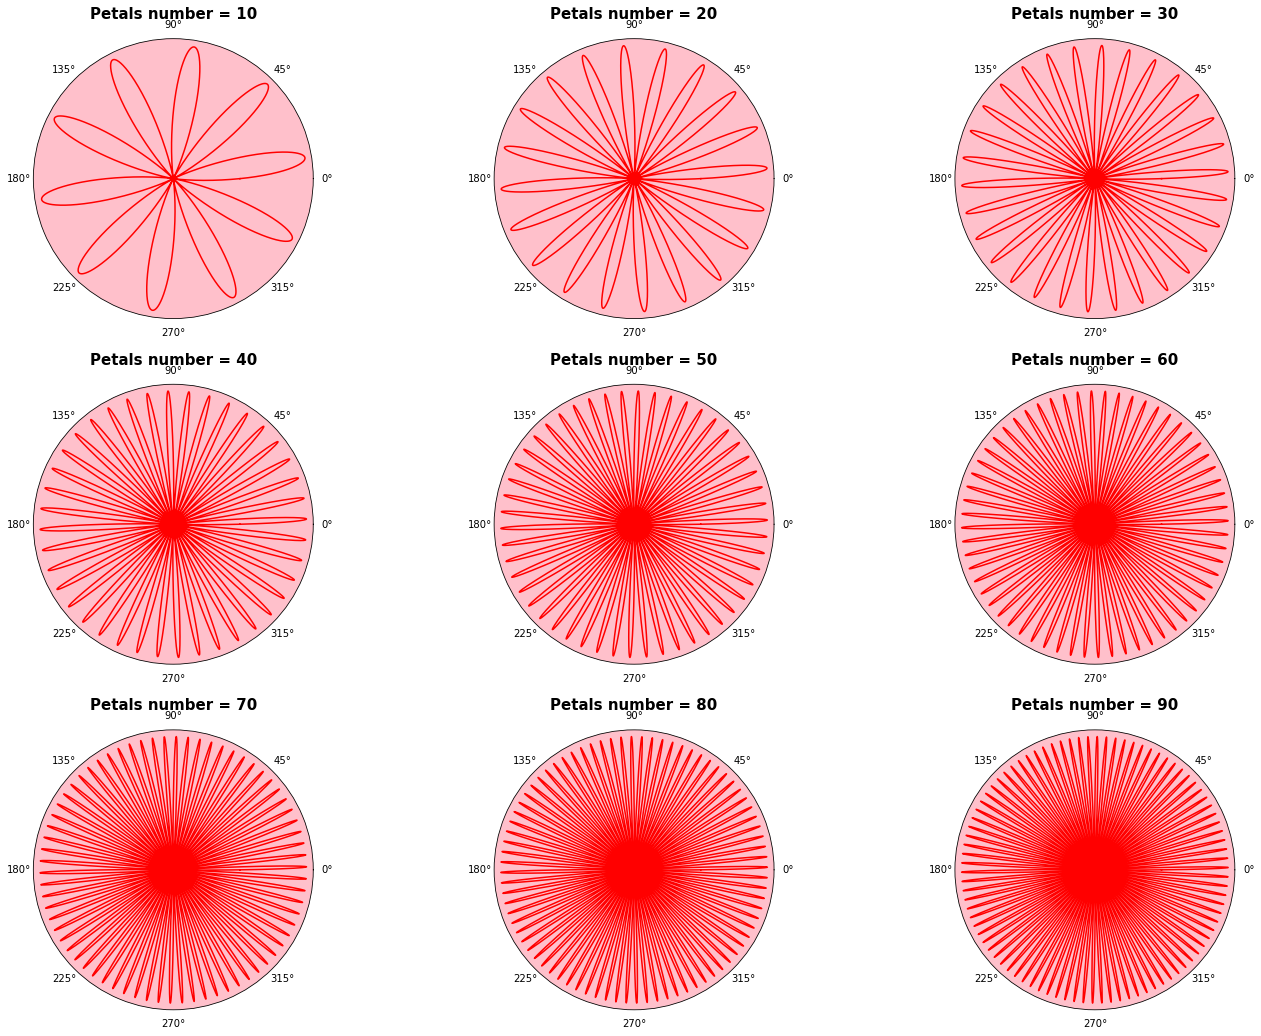

In [10]:
my_flowers = MultiSchedule(3, 3, create_flower)

for i in range(10, 91, 10):
    my_dict = {'petals_num' : i}
    
    my_flowers.add_schedule(my_dict, polar_flag=True)
    
my_flowers.show()

#### Пункт 3.3. График бабочки.

**Цель**: построение графика бабочки в полярной системе координат.

*Примечание*: $ r(\varphi) = e^{\sin\varphi} - 2\cos 4\varphi + \sin^5(\frac{2\varphi - \pi}{24})$

#### Реализация.

In [11]:
def create_butterfly(ax, color_v='b'):
    """
    There is a function that paints butterfly 
    with defined petals number
    
    """
    phi = np.linspace((-8) * np.pi, 8 * np.pi, 360 * 8)
    r = np.exp(np.sin(phi)) - 2 * np.cos(4 * phi) + (np.sin((2 * phi - np.pi) / 24)) ** 5
    
    ax.plot(phi, r, color=color_v)
    ax.set_rticks([])
    
    ax.grid(False)

#### Непосредственное выполнение задачи. 

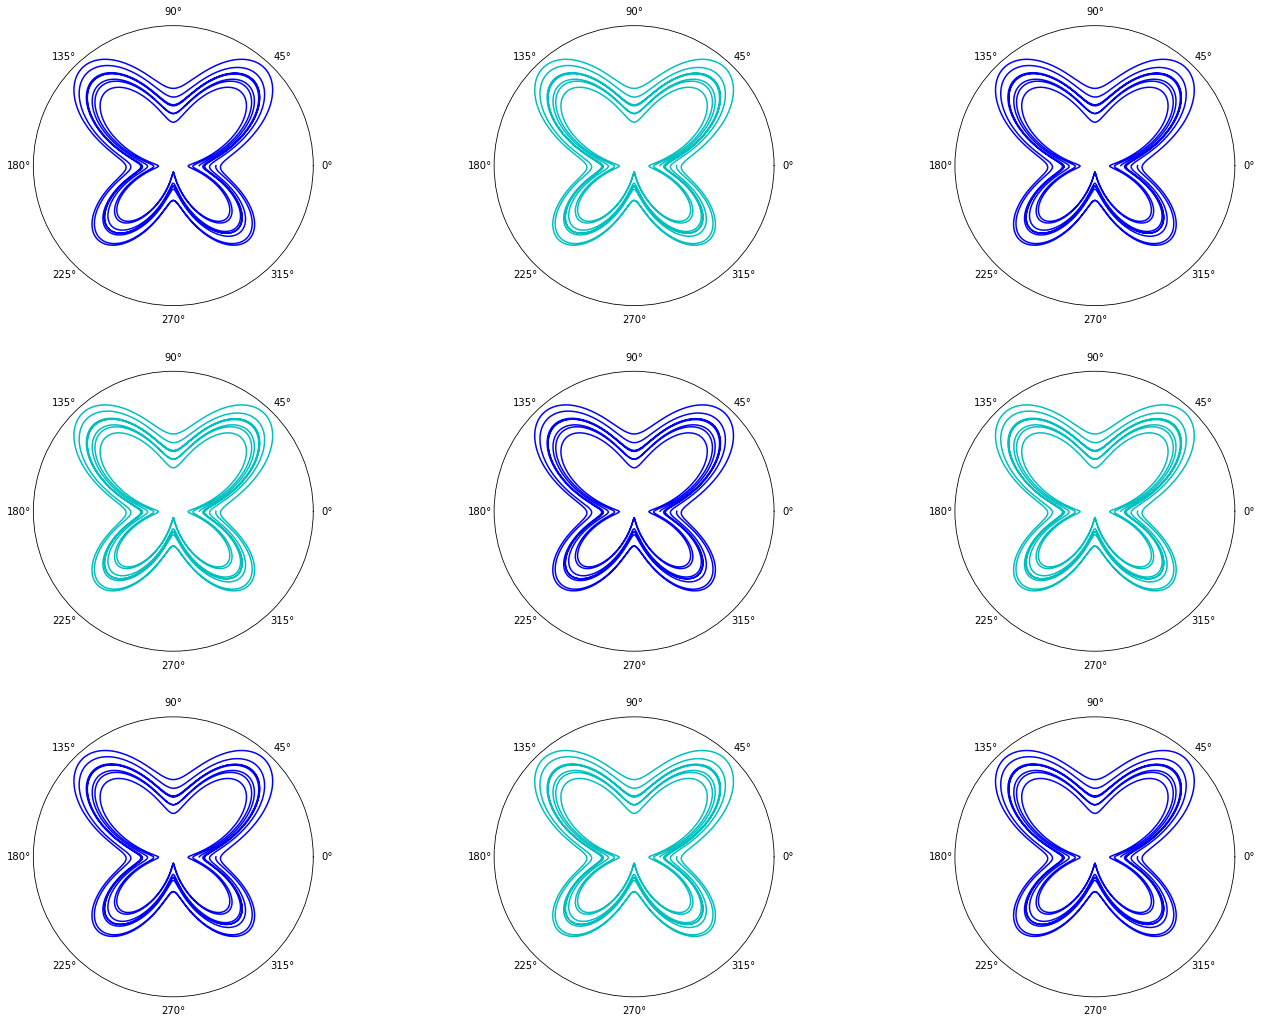

In [12]:
my_butterfly = MultiSchedule(3, 3, create_butterfly)

for i in range(1, 10):
    arr = [{'color_v' : 'c'}, {'color_v' : 'b'}]
    
    my_butterfly.add_schedule(arr[i % 2], polar_flag=True)
    
my_butterfly.show()

### Задание №4.

**Цель**: поточечное отображение изображения с помощью scatter().

#### Реализация.

In [13]:
def draw_by_scatter(image):
    """
    This function converts original image
    into scatter image and compare they
    
    """
    fig, ax = plt.subplots(1, 2, figsize=(6.4 * 3, 6.4 * 1.5))

    shape = image.shape[:2]

    ax[0].imshow(image)
    ax[0].set_title('Original', fontsize=20, fontweight='bold')
    ax[0].set_xticks([])
    ax[0].set_yticks([])

    for i in range(0, shape[0], 5):
        for j in range(0, shape[0], 5):
            ax[1].scatter(j, shape[0] - i - 1, color=(image[i, j] / 255))
        
    ax[1].set_title('Scatter', fontsize=20, fontweight='bold')
    ax[1].set_xticks([])
    ax[1].set_yticks([])

    plt.show()

#### Непосредственное выполнение задания.

In [14]:
image = cv2.imread('warhol.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

draw_by_scatter(image)

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-wwma2wne\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


### Задание №5.

#### Пункт 5.1. Нормальное распределение.

**Цель**: построение графика нормального распределения $f(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp(-\frac{(x - \mu)^2}{2\sigma^2})$

#### Реализация.

In [15]:
def normal_distribution(ax, disp=1, mu=0):
    """
    This function counts normal distributions
    and add it to ax
    
    disp - dispersion value
    
    mu - mean value
    
    """
    try:
        x = np.linspace(-10, 10, 10000)
        
        y = np.exp((-1) * (x - mu) ** 2 / (2 * disp))
        y = y / (np.sqrt(disp * 2 * np.pi))
    
        ax.plot(x, y, color='b', label=f'd = {round(disp, 2)}, <x> = {round(mu, 2)}')
    
        ax.set_title('Normal Distribution', 
                     fontsize=20, fontweight='bold')
        ax.set_xlabel('Amount', fontsize=11, fontweight='bold')
        ax.set_ylabel('Probability', fontsize=11, fontweight='bold')
        ax.set_xlim(-10, 10)
        ax.set_ylim(0, 1)
        ax.set_xticks(np.linspace(-10, 10, 11))
        
        ax.legend()
        ax.grid()
        
    except ZeroDivisionError:
        print('ZeroDivisionError: disp = 0')

#### Непосредственное выполнение задачи.

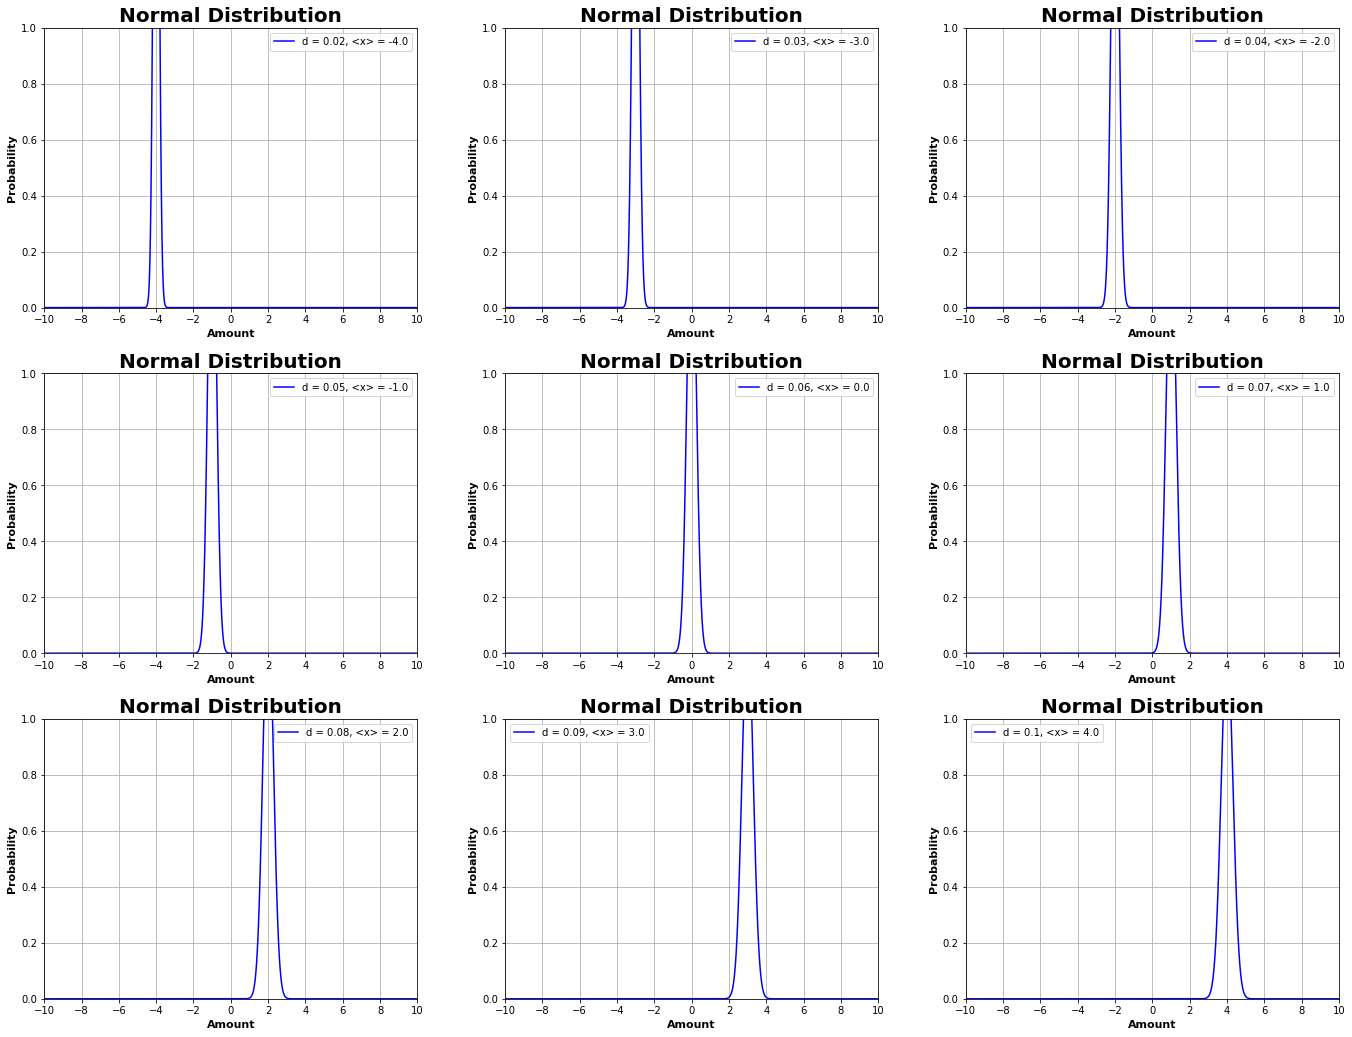

In [16]:
disps = np.arange(0.02, 0.11, 0.01)
means = np.linspace(-4, 4, 9)

my_distributions = MultiSchedule(3, 3, normal_distribution)

for i in range(len(disps)):
    my_dict = {'disp' : disps[i], 'mu' : means[i]}
    
    my_distributions.add_schedule(my_dict)
    
my_distributions.show()

#### Пункт 5.2. Распределение Максвелла.

**Цель**: построение графика распределения Максвелла $f(v) = 4\pi v^2\sqrt{(\frac{m}{2\pi k T})^3}\exp(\frac{-mv^2}{2kT})$

*Замечание*: графики только описывают форму распределения Максвелла, но не дают точных результатов, поскольку для простоты вычислений был опущен порядок постоянной Больцмана.

#### Реализация.

In [210]:
def maxwell_distribution(ax, m=1, t=0):
    """
    This function approximate Maxwell distributions
    and add it to ax
    
    m - particle mass value
    
    t - temperature value
    
    """
    try:
        t += 273
        
        v = np.linspace(0, 100, 50000)
        amount = np.sqrt((m / (2 * np.pi * t * 1.38)) ** 3)
        amount *= np.exp((-m) * v ** 2 / (2 * t * 1.38)) * v ** 2
        
        ax.plot(v, amount, color='b', label=f't = {t} K')
        
        ax.set_title('Maxwell Distribution', fontsize=20, fontweight='bold')
        ax.set_xticks(np.linspace(0, 100, 6))
        ax.set_xlim(0, 100)
        ax.set_ylim(0, 0.005)
        
        ax.legend()
        ax.grid()
        
    except ZeroDivisionError:
        print('ZeroDivision: t = 0')

#### Непосредственное выполнение задания.

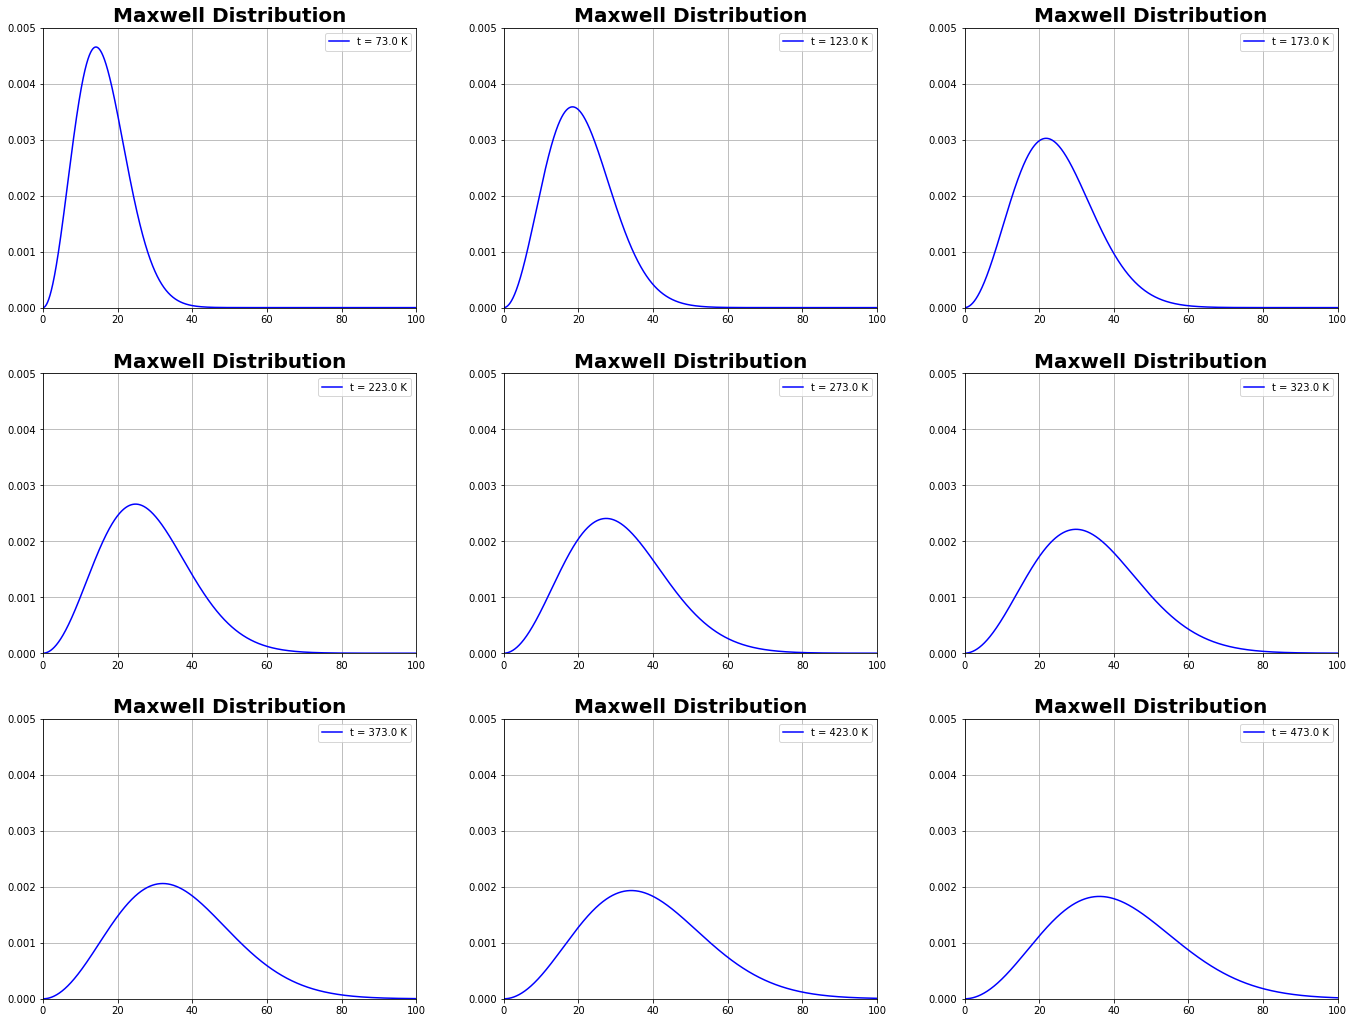

In [211]:
temps = np.linspace(-200, 200, 9)

my_distributions = MultiSchedule(3, 3, maxwell_distribution)

for temp in temps:
    my_dict = {'t' : temp}
    
    my_distributions.add_schedule(my_dict)

my_distributions.show()

#### Пункт 5.3. Распределение Пуассона. 

**Цель**: построение графика распределения Пуассона $f(x) = \frac{\lambda^x}{x!}e^{-\lambda}$

#### Реализация.

In [212]:
def poisson_distribution(ax, lamb=1):
    """
    This function counts Poisson distributions
    and add it to ax
    
    lamb - mean value
    
    """
    x = np.linspace(0, 20, 21)
    
    y = np.array([lamb ** i / np.math.factorial(i) for i in x])
    y *= np.exp(-lamb)
    
    ax.plot(x, y, color='b', label=f'<x> = {lamb}')
    
    ax.set_title('Poisson Distribution', fontsize=20, fontweight='bold')
    ax.set_xlabel('Amount', fontsize=11, fontweight='bold')
    ax.set_ylabel('Probability', fontsize=11, fontweight='bold')
    ax.set_xticks(np.linspace(0, 20, 11))
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 0.5)
    
    ax.legend()
    ax.grid()

#### Непосредственное выполнение задания.

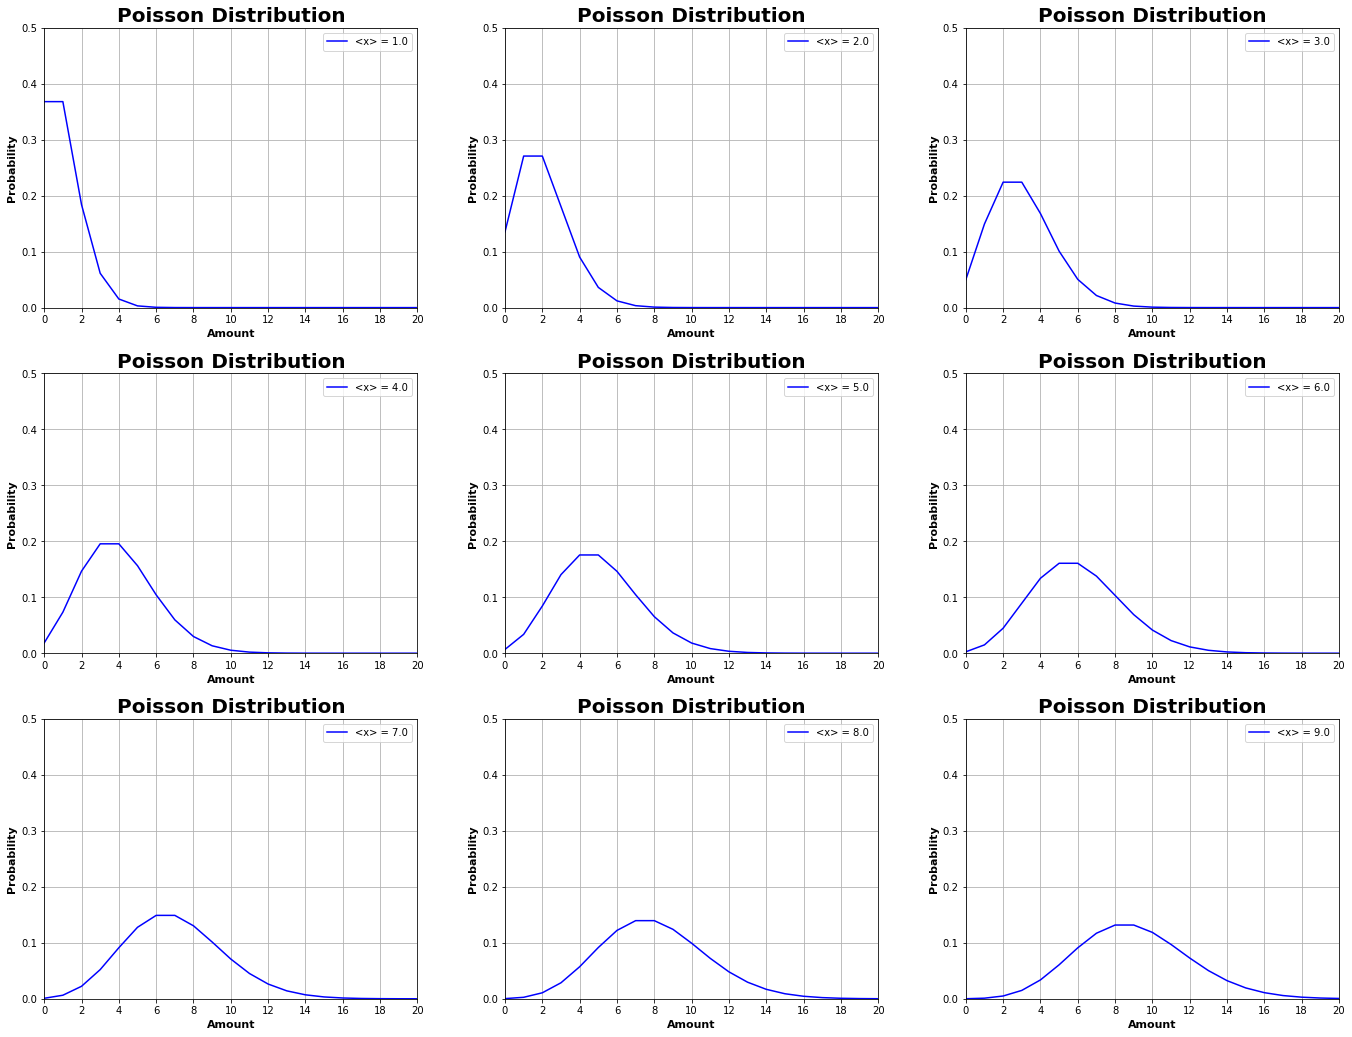

In [213]:
lambdas = np.linspace(1, 9, 9)

my_distributions = MultiSchedule(3, 3, poisson_distribution)

for i in lambdas:
    my_distributions.add_schedule({'lamb' : i})
    
my_distributions.show()

#### Пункт 5.4. Биномиальное распределение.

**Цель**: построение графика биномиального распределения $f(k) = C^{k}_{n}p^{k}q^{n - k}, k = 0, 1, ..., n$

#### Реализация.

In [214]:
def find_combinations_number(n, k):
    """
    This function counts C(n, k)
    
    """
    if n < k:
        return 0;
    
    up = np.math.factorial(n)
    
    down = np.math.factorial(k) * np.math.factorial(n - k)
    
    return up / down

In [215]:
def count_binary_distribytion(n, p):
    """
    This function counts binary distribution
    
    n - amount of particles
    
    p - probability value
    
    """
    y = []
    
    for i in range(n + 1):
        yi = find_combinations_number(n, i)
        yi *= (p ** i)
        yi *= ((1 - p) ** (n - i))
        
        y.append(yi)
        
    return y

In [216]:
def binary_distribution(ax, num=1, prob=1):
    """
    This function counts binary distributions
    and add it to ax
    
    n - amount of particles
    
    p - probability value
    
    """
    x = np.arange(num + 1)
    y = count_binary_distribytion(num, prob)
    
    ax.plot(x, y, color='b', label=f'num = {num}, prob={round(prob, 2)}')
    
    ax.set_title('Binomial Distribution', fontsize=20, fontweight='bold')
    ax.set_xticks(np.linspace(0, num, 5))
    ax.set_xlabel('Amount', fontsize=11, fontweight='bold')
    ax.set_ylabel('Probability', fontsize=11, fontweight='bold')
    ax.set_xlim(0, num)
    ax.set_ylim(0, 0.5)
    
    ax.legend()
    ax.grid()

#### Непосредственное выполнение задания.

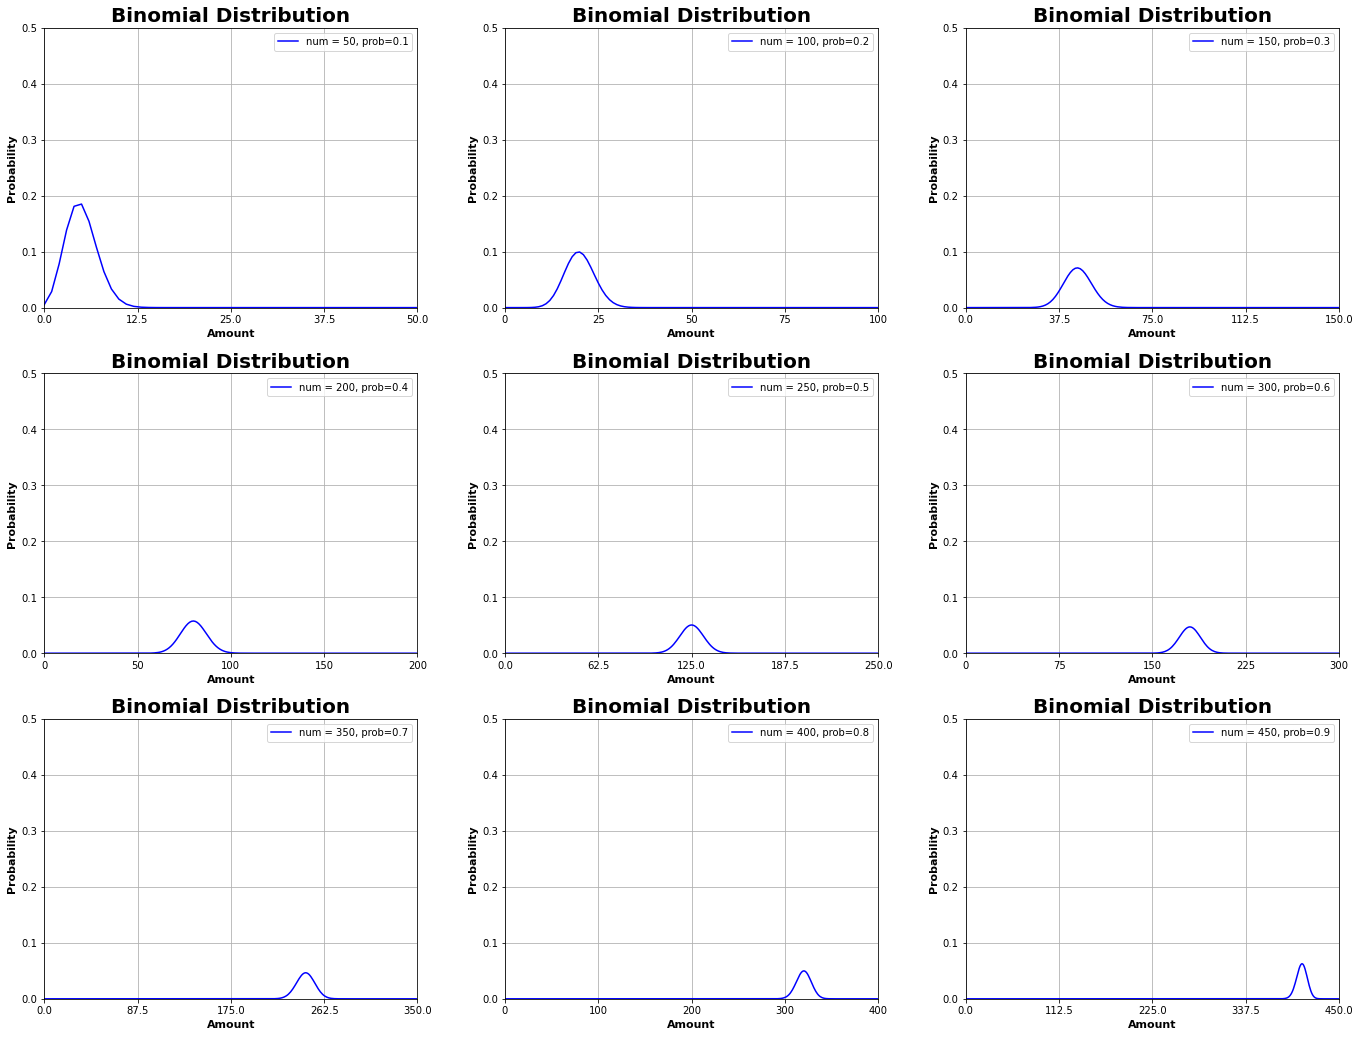

In [217]:
numbers = np.array(np.linspace(50, 450, 9), dtype = np.int32)
probs = np.linspace(0.1, 0.9, 9)

my_distributions = MultiSchedule(3, 3, binary_distribution)

for i in range(len(probs)):
    my_dict = {'num' : numbers[i], 'prob' : probs[i]}
    
    my_distributions.add_schedule(my_dict)
    
my_distributions.show()